In [2]:
#requirements: pytorch>=1.6.0 numpy tqdm matplotlib
import numpy as np
from tqdm import tqdm
from network1 import IDreveal
import matplotlib.pyplot as plt
from numpy import load
import statistics as stat 

In [43]:
device   = 'cpu' # in ('cpu', 'cuda:0', 'cuda:1')
time     = 100   # length of sequences in frames

ref_vids = [ 'Dataset/feats/000', ] # Reference Videos


test_vids =  [ # Test Videos 
    #(Video, Type),
    ('Dataset/feats/001',  1),
    ('Dataset/feats/002',  1),
]

typ_colors = ['C2', 'C3'] # color for each type of video
typ_labels = ['Real videos', 'Deepfakes'] # label for each type of video

In [44]:
net = IDreveal(time=time, device=device, weights_file='./model.th')
def extract_embedding(x):
    if isinstance(x, str):
        x = np.load(x) # load 3ddfa features
    y = net(x['arr_1']) # apply Temporal ID Network arr_1 contain the 3ddfa features array of vector have 62 coeff
    return y


In [45]:
# extract embedded vectors for reference videos
print('Extracting embedded vectors for reference videos', flush=True)
ref_embs = np.concatenate([extract_embedding('./feats/%s.npz' % vid) for vid in tqdm(ref_vids)], 0)
print(flush=True)
print('Number of reference embedded vectors:', len(ref_embs), flush=True)


# print([extract_embedding('./feats/%s.npz' % vid) for vid in tqdm(ref_vids)])

Extracting embedded vectors for reference videos


100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Number of reference embedded vectors: 297


In [46]:
print('Extracting embedded vectors and distance computation for test videos', flush=True)
list_dist = list()
count_embs = 0
for vid, typ in tqdm(test_vids):
    embs = extract_embedding('Dataset/feats/%s.npz' % vid) # extract embedded vectors for a test video
    count_embs = count_embs + len(embs)
    dist = np.min(np.sum(np.square(ref_embs[None,:,:]-embs[:,None,:]),-1),-1) # compute distances
    list_dist.append((dist, typ))
    

    #Jihad(To show the number of embeded vector for each video)
    #print('Total number of extracted vectors of video %s is:'%vid, len(embs), flush=True)
    ##########################
    
print(flush=True)
print('Total number of extracted vectors:', count_embs, flush=True)
print(list_dist)

Extracting embedded vectors and distance computation for test videos


100%|██████████| 2/2 [00:04<00:00,  2.21s/it]


Total number of extracted vectors: 501
[(array([1.5066034 , 1.4755685 , 1.4055097 , 1.4613216 , 1.4304607 ,
       1.4539752 , 1.4032588 , 1.4624736 , 1.4369608 , 1.4766634 ,
       1.4580903 , 1.4439316 , 1.4542387 , 1.4195487 , 1.5068376 ,
       1.4463947 , 1.4468473 , 1.4139445 , 1.4395281 , 1.392686  ,
       1.4665647 , 1.3979998 , 1.4317944 , 1.3714187 , 1.3962352 ,
       1.4085119 , 1.396614  , 1.3752401 , 1.4250214 , 1.3717856 ,
       1.3552244 , 1.367882  , 1.389072  , 1.3224208 , 1.2874979 ,
       1.2926062 , 1.3201612 , 1.3291323 , 1.239234  , 1.3274362 ,
       1.3699557 , 1.4032844 , 1.3578752 , 1.4978893 , 1.4743352 ,
       1.4687889 , 1.4428401 , 1.5090628 , 1.4450642 , 1.468365  ,
       1.4147222 , 1.4164177 , 1.3446715 , 1.3383733 , 1.325696  ,
       1.3254218 , 1.2813351 , 1.3360139 , 1.3027567 , 1.3276266 ,
       1.3149964 , 1.3647077 , 1.3745257 , 1.39275   , 1.405923  ,
       1.4342647 , 1.4464023 , 1.4470547 , 1.4359171 , 1.4413226 ,
       1.4480076 , 1

C:\Users\User\AppData\Local\Temp\ipykernel_12600\3087368063.py:36: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(typ_id,  typ_labels, bbox_to_anchor=(1.04, 1), loc='upper left', fontsize=12.0)


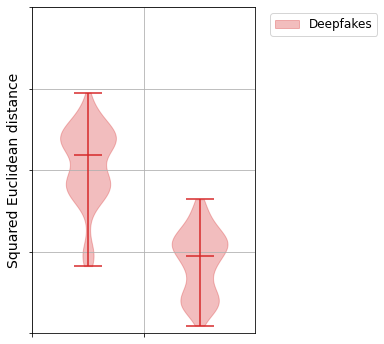

In [56]:
def set_color_violin(parts, color):
    #utlity function to change the color of violin-plot
    ret = None
    for keys in parts:
        if keys=='bodies':
            for pc in parts['bodies']:
                ret = pc
                pc.set_facecolor(color)
                pc.set_edgecolor(color)
        else:
            parts[keys].set_edgecolor(color)
            parts[keys].set_facecolor(color)
    return ret

    
# show violin-plot
plt.figure(figsize=(4,6))
typ_id = [None for _ in typ_labels]
for i, (dist, typ) in enumerate(list_dist):
    parts = plt.violinplot(dist, positions=(i+0.5,) ,showmedians=True, points=dist.size)
    typ_id[typ] = set_color_violin(parts, typ_colors[typ])

#Jihad 
# print(list_dist)
# #Jihad The threshold value is sqrt(1.1)
# print(np.average(list_dist[7][0])) #mean value of distances for the video number 8 in testing videos
# print(np.median(list_dist[7][0]))  #median value of distances for the video number 8 in testing videos
# print(stat.variance(list_dist[6][0]))

plt.xlim([0,len(list_dist)])
plt.xticks(np.arange(len(list_dist)),[])
plt.ylim([0.5,0.7])
plt.yticks([0.5,1,1.5,2,2.5],[], fontsize=10.0)
plt.ylabel('Squared Euclidean distance', fontsize=14.0)

plt.legend(typ_id,  typ_labels, bbox_to_anchor=(1.04, 1), loc='upper left', fontsize=12.0)
plt.grid()
plt.show()    